In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [14]:
#init 100 arbitrary genes
genes = ['gene'+str(i) for i in range(1,101)]

In [15]:
#10 differnet samples
wt = ['wt' +str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]

In [16]:
#put genes and samples into a data frame
data = pd.DataFrame(columns = [*wt,*ko],index=genes)

In [17]:
#simulate some random poisson data
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)

In [23]:
#print the data and dimensions
print(data.shape)
data.head()

(100, 10)


,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,32,47,54,38,42,721,763,732,697,746
gene2,669,666,616,652,649,944,946,934,880,911
gene3,526,556,548,481,507,343,364,382,377,336
gene4,192,225,206,204,204,619,632,615,630,664
gene5,331,304,335,314,328,724,784,757,764,738


In [42]:
#scale the data so rows have 0 mean and unit variance
scaled_data = preprocessing.scale(data.T)

In [50]:
#preform the PCA
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

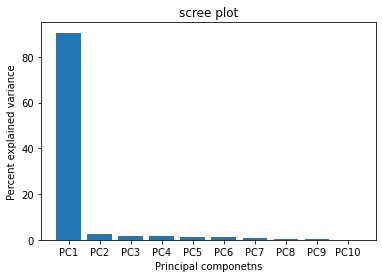

In [62]:
#produce the scree plot
#over 90% of the variation in the data is explained by the first principal component 
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.title("scree plot")
plt.xlabel("Principal componetns")
plt.ylabel("Percent explained variance")
plt.show()

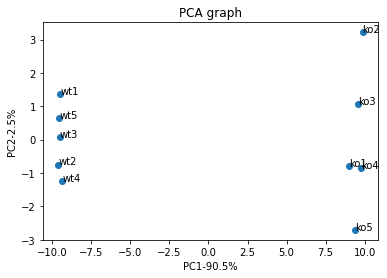

In [60]:
#create a pc1 pc2 plot 
#showing that the wt are clustered together suggesting they are correlated 
#same for ko samples, this is what we expect from how we simulaed our data
pca_df = pd.DataFrame(pca_data,index=[*wt, *ko],columns=labels)

plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title("PCA graph")
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PC2-{0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [63]:
#creates the loading scores
#the loading scores are similar, this suggests that lots of variables (genes) are responsible for the seperation of the samples
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])


gene96    0.105054
gene99   -0.105038
gene37    0.105029
gene83   -0.105028
gene69    0.105012
gene51   -0.105010
gene30   -0.105007
gene32    0.104998
gene18   -0.104989
gene75    0.104970
dtype: float64
